In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from evaluation import *
plt.rcParams['figure.figsize'] = (6, 6)

In [2]:
dr = DetectionResults('../reval_50/baseline_50/evaluator_dump_R50_101/', area_rng=None, iou_thresh=None, debug=0)

nCats: 80 1600000 1600000


In [3]:
nGT = dr.num_gt_class('person')
dets = dr.detections_by_class('person')

In [4]:
TP = np.cumsum([det["true_positive"] for det in dets])
FP = np.cumsum([not det["true_positive"] for det in dets])
TPR = TP / nGT
PPV = TP / (TP + FP)
PPVi = interpolated_PPV(PPV)
len(PPV)

8205

In [17]:
# see COCOeval.accumulate()

recThrs, q = resample_pr_curve(TPR, PPVi, np.linspace(0.0, 1.00, 11, endpoint=True))

### Precision vs monotonic precision

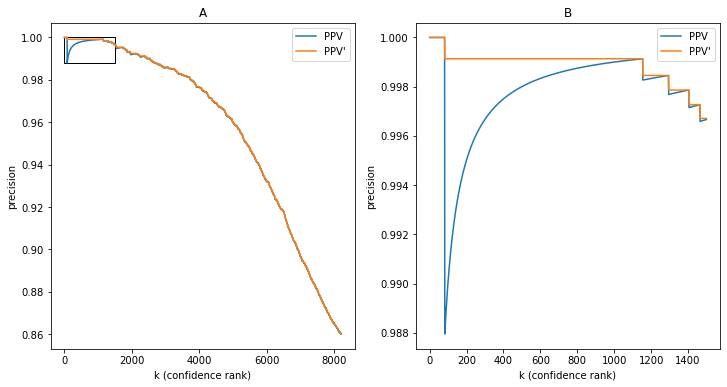

In [6]:
from matplotlib.patches import Rectangle
# plt.rcParams['figure.figsize'] = (14, 14)
# fig = plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes = iter(axes.ravel())
ax2 = next(axes)
ax2.plot(PPV, label="PPV");
ax2.plot(PPVi, label="PPV'");
ax2.set_title('A')
ax2.set_ylabel("precision")
ax2.set_xlabel("k (confidence rank)")
ax2.legend();
ax2.add_patch(Rectangle((0, PPV[:1500].min()), 1500, 1-PPV[:1500].min(), fill=False))


ax2 = next(axes)
ax2.plot(PPV[:1500], label="PPV");
ax2.plot(PPVi[:1500], label="PPV'");
ax2.set_title('B')
ax2.set_ylabel("precision")
ax2.set_xlabel("k (confidence rank)")
ax2.legend();

fig.savefig("PPV_vs_PPVi.pdf")

### PR-curve and AveP / AP

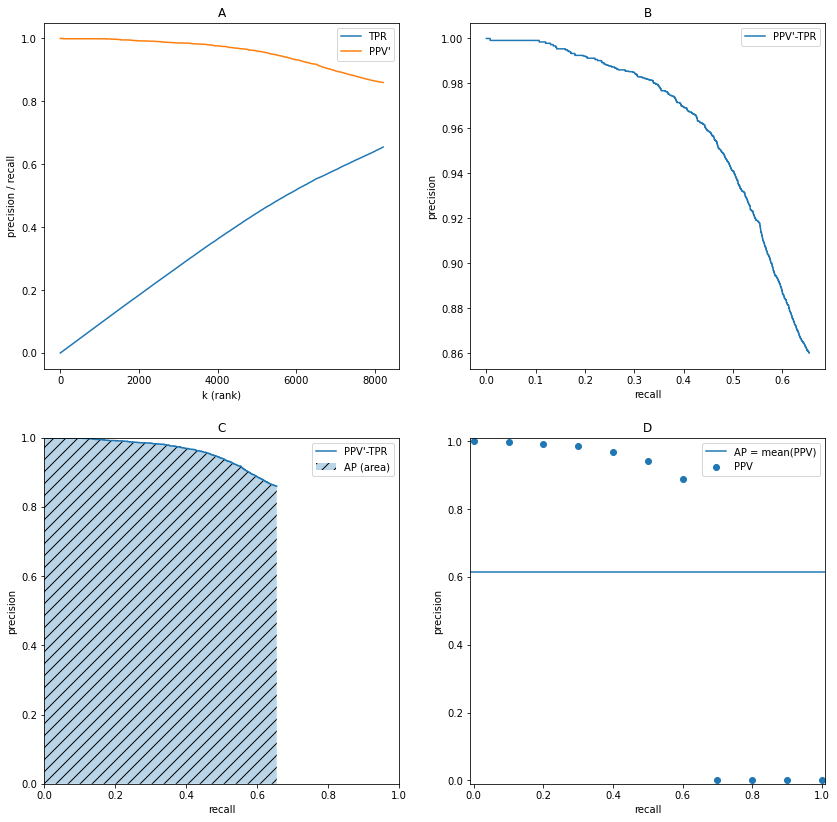

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
# fig.suptitle('Precision-recall curves')

axes = iter(axes.ravel())

ax2 = next(axes)
ax2.plot(TPR, label="TPR");
# ax2.plot(PPV, label="PPV");
ax2.plot(PPVi, label="PPV'");
ax2.set_title('A')
ax2.set_ylabel("precision / recall")
ax2.set_xlabel("k (rank)")
ax2.legend();

ax2 = next(axes)
ax2.plot(TPR, PPVi, label="PPV'-TPR");
ax2.set_title('B')
ax2.set_ylabel("precision")
ax2.set_xlabel("recall")
ax2.legend()

ax2 = next(axes)
ax2.plot(TPR, PPVi, label="PPV'-TPR");
ax2.set_title('C')
ax2.set_ylabel("precision")
ax2.set_xlabel("recall")
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.fill_between(TPR, PPVi, hatch='//', alpha=0.3, label='AP (area)')
ax2.legend()

ax2 = next(axes)
ax2.scatter(recThrs, q, label="PPV");
ax2.axhline(np.mean(q), label="AP = mean(PPV)")
ax2.set_title('D')
ax2.set_ylabel("precision")
ax2.set_xlabel("recall")
ax2.set_xlim([-0.01, 1.01])
ax2.set_ylim([-0.01, 1.01])
ax2.legend()

fig.savefig("PR_AP_examples.pdf")

In [63]:
# >>> np.searchsorted([1, 2, 3], [-1, 0, 1, 2, 4], side="left")
# array([0, 0, 0, 1, 3])
# producing index 3, out of bounds

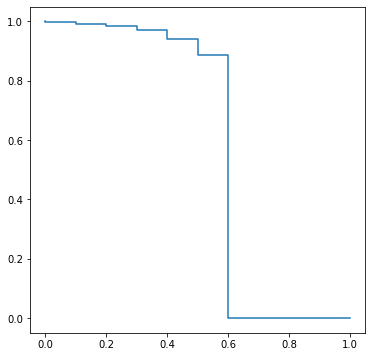

In [24]:
plt.step(recThrs, q)

In [15]:
dr.coco.accumulate() 

Accumulating evaluation results...
DONE (t=2.18s).


In [16]:
dr.coco.eval['precision'][0, :, 0, 0, 0]

array([1.        , 0.99897541, 0.99897541, 0.99897541, 0.99897541,
       0.99897541, 0.99897541, 0.99897541, 0.99897541, 0.99897541,
       0.99751037, 0.99751037, 0.99548872, 0.9941452 , 0.9941452 ,
       0.9941452 , 0.99367089, 0.9919181 , 0.99131767, 0.99085219,
       0.98765432, 0.98093588, 0.97132323, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
q

array([1.        , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
       0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
       0.9991342 , 0.9984556 , 0.99786477, 0.99786477, 0.99671053,
       0.99538905, 0.99538905, 0.99407008, 0.9924812 , 0.9924812 ,
       0.99219826, 0.99122807, 0.99122807, 0.99015748, 0.9886148 ,
       0.9877212 , 0.9869993 , 0.98602081, 0.98602081, 0.98523869,
       0.98480705, 0.98295622, 0.98242132, 0.9816237 , 0.9802139 ,
       0.97873995, 0.97673837, 0.97518248, 0.97410311, 0.97146802,
       0.96966974, 0.96781257, 0.96648164, 0.96316987, 0.96186613,
       0.95878525, 0.95659722, 0.9515402 , 0.94901889, 0.9452496 ,
       0.94099162, 0.93646738, 0.9319615 , 0.92757389, 0.92322335,
       0.9189273 , 0.91099713, 0.90431326, 0.89856322, 0.89350941,
       0.88748628, 0.88217928, 0.87621296, 0.87043445, 0.86547141,
       0.86133989, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
dr.coco.eval['precision'].shape

(10, 101, 80, 4, 3)

In [18]:
dr.coco.eval['precision'][0, :, 1, 0, 0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.95652174, 0.95652174,
       0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.95652174,
       0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.95652174,
       0.95652174, 0.95652174, 0.94805195, 0.94805195, 0.94047619,
       0.94047619, 0.92222222, 0.91489362, 0.90721649, 0.88571429,
       0.88073394, 0.85217391, 0.84166667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
np.mean(dr.coco.eval['precision'][0, :, 1, :, :])

0.45639812191854084

In [20]:
np.mean(dr.coco.eval['precision'][:, :, :, :, :])

0.2849131008682629

In [21]:
dr.coco.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.316
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.443
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.352
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.141
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.348
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.443
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.361
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.394
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.519


In [22]:
dr.names.name_to_id('person')

1

In [23]:
# I guess -1 precision is for FP = FP = 0
s = dr.coco.eval['precision']
s.min()

0.0